In [1]:
# Library Yang Digunakan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Google Drive dan Load Dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/winequality-red.csv'
data = pd.read_csv(file_path)


Mounted at /content/drive


In [3]:
# Cek Dataset (Print 5 Baris Pertama)
print(" 5 Baris Pertama Dataset: ")
print(data.head())

 5 Baris Pertama Dataset: 
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8     

In [4]:
# Cek dan Tangani Missing values (Jika Ada)
print("Jumlah missing value per kolom:\n", data.isnull().sum())

Jumlah missing value per kolom:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# Pisahkan Fitur dan Label
X = data.drop('quality', axis=1)
y = data['quality']

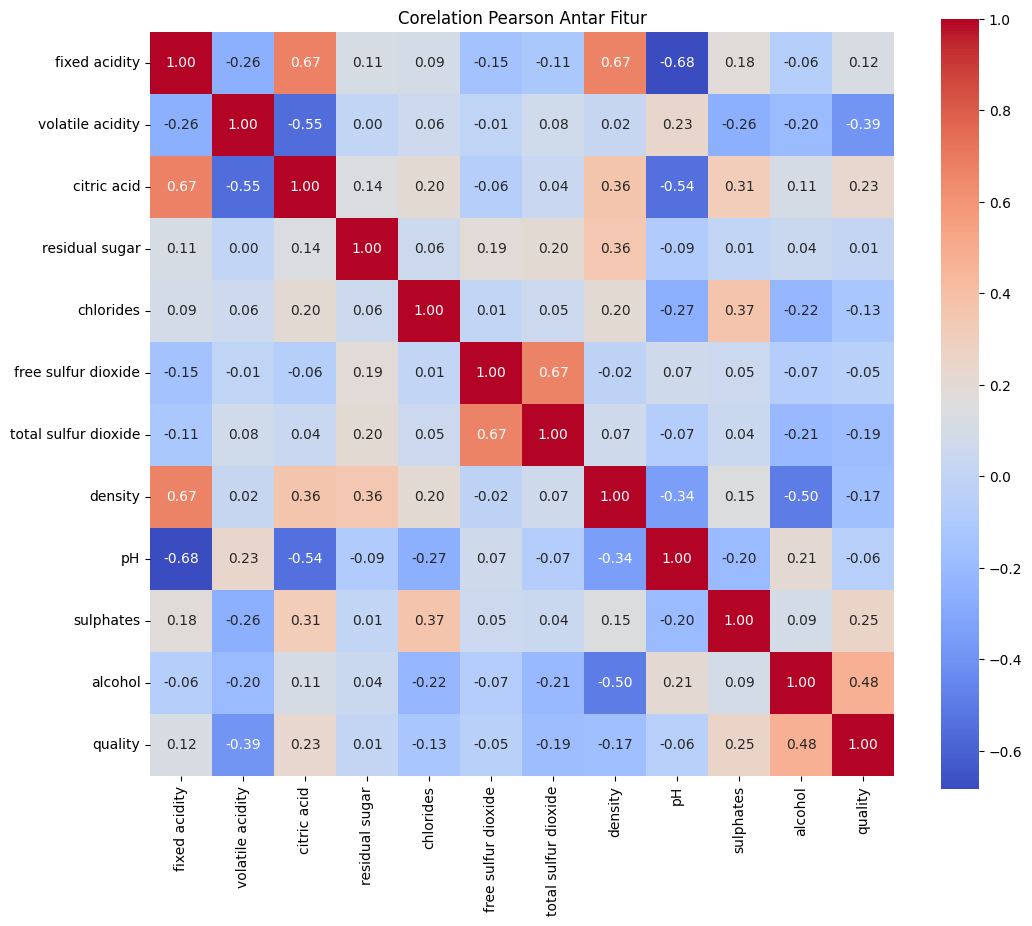

In [6]:
# Corelation Pearson
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Corelation Pearson Antar Fitur")
plt.show()

In [7]:
# MinMax Scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# LDA (reduksi dimensi, supervised)
lda_model = LDA(n_components=1)
X_lda = lda_model.fit_transform(X_scaled, y)

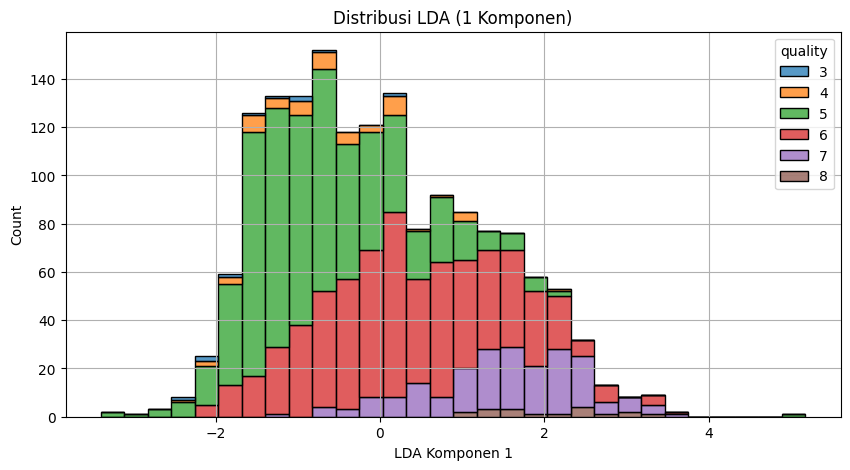

In [9]:
# Visualisasi LDA (karena hanya 1D, tampilkan distribusi sebagai histogram)
plt.figure(figsize=(10, 5))
sns.histplot(x=X_lda[:, 0], hue=y, multiple='stack', palette='tab10', bins=30)
plt.title("Distribusi LDA (1 Komponen)")
plt.xlabel("LDA Komponen 1")
plt.grid(True)
plt.show()

In [10]:
# Split Data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [11]:
# SVM dengan Kernel Linear
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [12]:
# SVM dengan Kernel RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)


Akurasi (SVM Linear (LDA)): 0.5781


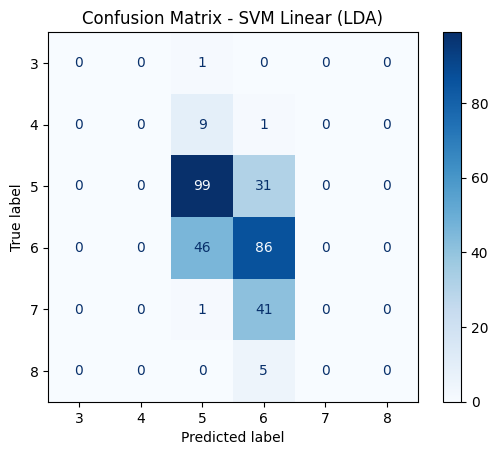


Akurasi (SVM RBF (LDA)): 0.5781


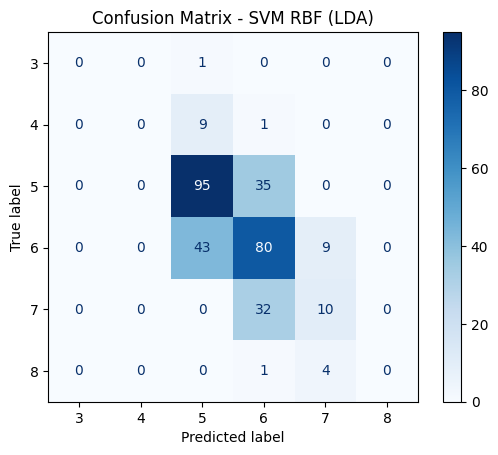

In [13]:
def evaluate_model(y_test, y_pred, title):
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    print(f"\nAkurasi ({title}): {acc:.4f}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

evaluate_model(y_test, y_pred_linear, "SVM Linear (LDA)")
evaluate_model(y_test, y_pred_rbf, "SVM RBF (LDA)")